# FTIR

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
def readData(path): # Функция для считывания данных
    data = pd.read_table(path, sep = '\s+' )
    x = data['x']
    y = data['y']
    return(x,y)

In [3]:
def plotData(x,y,n): # Функция для визуализации
    plt.figure(figsize= (15,5)) 
    plt.plot(x[:len(x)//n], y[:len(y)//n],color = 'black')
    plt.xlabel("\nu$, " + "см^{-1}$")
    plt.ylabel("Интенсивность")
    plt.grid()

## Влияние разрешения на вид спектра

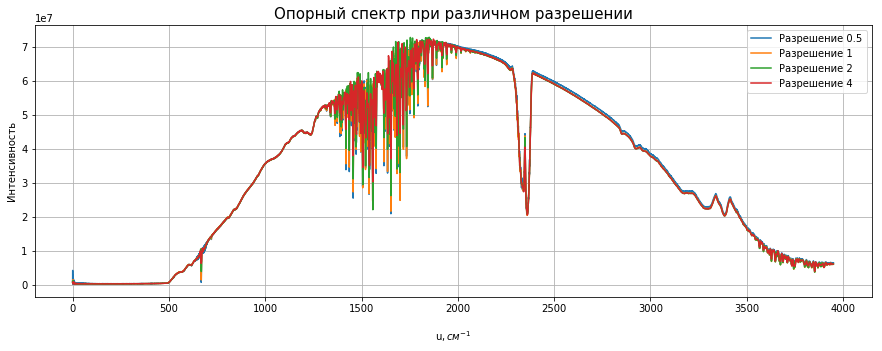

In [4]:
# Считываем данные 
task1_air_0_5 ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task1_air_0_5.ascii'
task1_air_1 ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task1_air_1.ascii'
task1_air_2 ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task1_air_2.ascii'
task1_air_4 ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task1_air_4.ascii'

x_05,y_05 = readData(task1_air_0_5)
x_1,y_1 = readData(task1_air_1)
x_2,y_2 = readData(task1_air_2)
x_4,y_4 = readData(task1_air_4)

x_05 = x_05[:len(x_05)//4]
y_05 = y_05[:len(y_05)//4]
x_1 = x_1[:len(x_1)//4]
y_1 = y_1[:len(y_1)//4]
x_2 = x_2[:len(x_2)//4]
y_2 = y_2[:len(y_2)//4]
x_4 = x_4[:len(x_4)//4]
y_4 = y_4[:len(y_4)//4]


plt.figure(figsize= (15,5)) 
plt.title(r'Опорный спектр при различном разрешении', size=15)
plt.plot(x_05, y_05,label = 'Разрешение 0.5')
plt.plot(x_1, y_1,label = 'Разрешение 1')
plt.plot(x_2, y_2,label = 'Разрешение 2')
plt.plot(x_4, y_4,label = 'Разрешение 4')
plt.xlabel("\nu$, " + "см^{-1}$")
plt.ylabel("Интенсивность")
plt.grid()
plt.legend()


x05 16384
x1 8192
x2 4096
x4 2048


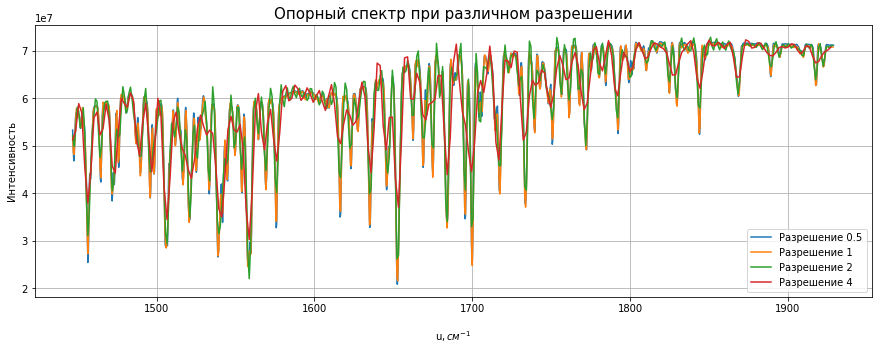

In [5]:
plt.figure(figsize= (15,5)) 
plt.plot(x_05[6000:8000], y_05[6000:8000],label = 'Разрешение 0.5')
plt.plot(x_1[3000:4000], y_1[3000:4000],label = 'Разрешение 1')
plt.plot(x_2[1500:2000], y_2[1500:2000],label = 'Разрешение 2')
plt.plot(x_4[750:1000], y_4[750:1000],label = 'Разрешение 4')
plt.title(r'Опорный спектр при различном разрешении', size=15)
plt.xlabel("\nu$, " + "см^{-1}$")
plt.ylabel("Интенсивность")
plt.grid()
plt.legend()
print("x05",len(x_05))
print("x1",len(x_1))
print("x2",len(x_2))
print("x4",len(x_4))


## Влияние апотизации на вид спектра

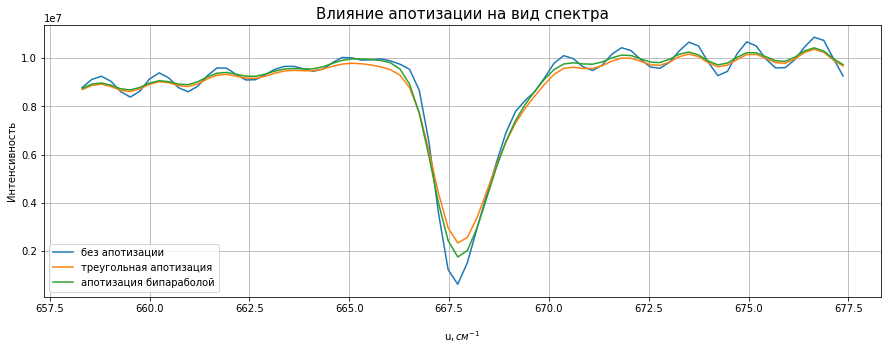

In [6]:
# Изобразим на примере одного пика из опорного спектра, как влияет на спектр вид апотизации

# Считываем данные 
task2_air_0_5 ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task1_air_0_5.ascii'
task2_air_0_5_triangle='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task2_air_0_5_triangle.ascii'
task2_air_0_5_parab ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/task2_air_0_5_parab.ascii'

xn,yn = readData(task2_air_0_5)
xt,yt = readData(task2_air_0_5_triangle)
xp,yp = readData(task2_air_0_5_parab)

xn,yn = xn[2730:2810],yn[2730:2810]
xt,yt = xt[2730:2810],yt[2730:2810]
xp,yp = xp[2730:2810],yp[2730:2810]

plt.figure(figsize= (15,5)) 
plt.plot(xn, yn,label = 'без апотизации')
plt.plot(xt,yt,label = 'треугольная апотизация')
plt.plot(xp, yp,label = 'апотизация бипараболой')
plt.title(r'Влияние апотизации на вид спектра', size=15)
plt.xlabel("\nu$, " + "см^{-1}$")
plt.ylabel("Интенсивность")
plt.grid()
plt.legend()


## Молекула HCL

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


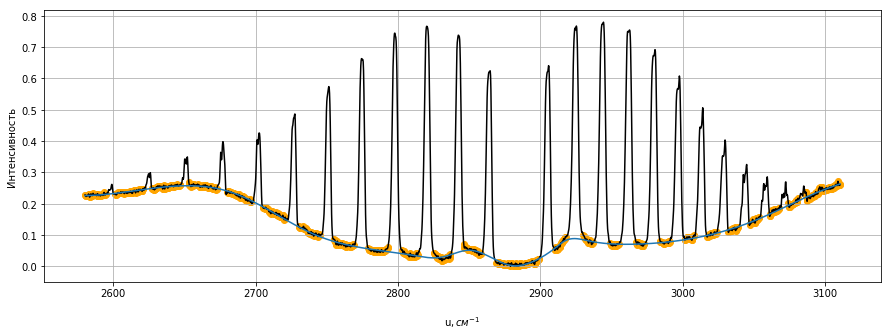

In [7]:
"""
Будем строить огибающую
"""
# Считываем данные
path1_hcl ='/home/dmitry/LatexProjects/physicalMethods/FTIR/data/hcl_minus_ogib.ascii'
x,y = readData(path1_hcl)
xData = np.array(x)
yData = np.array(y)

# Обрежем область для исследования
xData = xData[10700:12900]
yData = yData[10700:12900]

# получим спектр поглощения
yMax = yData[yData.argmax(0)]
for i in range(len(yData)):
    yData[i] = (1 - yData[i]/yMax)

# Выбираем точки для дальнейшей интерполяции:    
def processing():
    x_ = []
    y_ = []
    j = 0
    for i in range(len(xData)):
        X = xData[i]
        Y = yData[i]
        if(not ((X>2595 and X<2601) or (X>2621 and X<2627) or (X>2647 and X<2653)
          or(X>2673 and X<2680) or (X>2697 and X<2705) or (X>2721 and X<2730)
          or (X>2745 and X<2755) or (X>2769 and X<2779) or (X>2793 and X<2803)
          or(X>2814 and X<2825) or (X>2837 and X<2846) or (X>2858 and X<2869)
          or(X>2899 and X<2910) or (X>2918 and X<2930) or (X>2937 and X<2949)
          or(X>2955 and X<2967) or (X>2973 and X<2984) or (X>2991 and X<3001)
          or(X>3008 and X<3017) or (X>3024 and X<3032) or (X>3039 and X<3047)
          or(X>3054 and X<3061) or (X>3068 and X<3074) or (X>3081 and X<3086))):
            x_.append(X)
            y_.append(Y)
            j+=1
    return (x_,y_)

X,Y = processing()
 

from scipy import interpolate

# функция для интерполяции
def f(x,y):
    tck = interpolate.splrep(x, y,s = 0.025)
    return tck

# Визуализация
plotData(xData,yData,1)
ax = plt.subplot(111)
plt.scatter(X, Y,color = 'orange')   
plt.plot(xData,interpolate.splev(xData, f(X,Y)))

## Спектр поглощения HCL

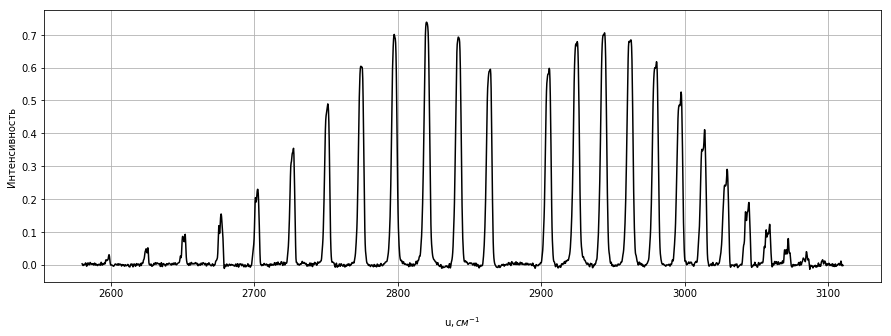

In [8]:
# Окончательно получим спектр поглощения hcl

xRes = xData
yRes = yData - np.array(interpolate.splev(xData, f(X,Y)))


plotData(xRes,yRes,1)

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


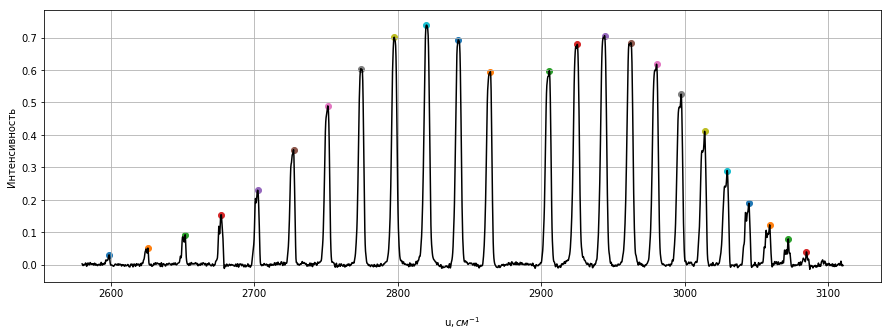

In [9]:
# Находим частоты, соответствующие нашим пикам:

from scipy.signal import find_peaks
peaks, _ = find_peaks(yRes, distance=50, width=5)

peaks = np.delete(peaks,3)
peaks = np.delete(peaks,12)
peaks = np.delete(peaks,12)

plotData(xRes,yRes,1)
for i in range(len(peaks)):
    plt.scatter(xRes[peaks[i]],yRes[peaks[i]])
ax = plt.subplot(111)
 

In [10]:
pnu = []
rnu = []
for i in range(12):
    pnu.append(xRes[peaks[-i-13]])
    rnu.append(xRes[peaks[-i-1]])

Pdata = {"\nu см$^{-1}$":pnu,'j"':[1,2,3,4,5,6,7,8,9,10,11,12]}
Rdata = {"\nu см$^{-1}$":np.sort(rnu),'j"':[0,1,2,3,4,5,6,7,8,9,10,11]}



dfP = pd.DataFrame(Pdata)
dfR = pd.DataFrame(Rdata)

In [11]:
print("P - ветвь")
dfP

P - ветвь


,u см$^{-1}$,"j"""
0,2864.75,1
1,2842.32,2
2,2820.14,3
3,2797.71,4
4,2774.56,5
5,2751.41,6
6,2727.54,7
7,2702.46,8
8,2677.14,9
9,2652.06,10


In [12]:
print("R - ветвь")
dfR 

R - ветвь


,u см$^{-1}$,"j"""
0,2905.74,0
1,2925.27,1
2,2944.32,2
3,2962.65,3
4,2980.50,4
5,2997.62,5
6,3014.01,6
7,3029.69,7
8,3044.88,8
9,3059.35,9


## Для каждого из значений j определяем комбинационные разности:

$\Delta_2 F'(j) = \nu_R(j) - \nu_P(j)$

$\Delta_2 F''(j) = \nu_R(j-1) - \nu_P(j+1)$

In [13]:
deltaF_ = []
deltaF__ = []
for i in range(1,12):
    deltaF_.append(dfR["\nu см$^{-1}$"][i] - dfP["\nu см$^{-1}$"][i-1])
    
for i in range(1,12):
    deltaF__.append(dfR["\nu см$^{-1}$"][i-1] - dfP["\nu см$^{-1}$"][i])    


Rdata = {"$\Delta_2 F' см^{-1}$": np.array(deltaF_),'$\Delta_2 F" см^{-1}$':np.array(deltaF__),'j':[1,2,3,4,5,6,7,8,9,10,11]}
dfF = pd.DataFrame(Rdata)   

dfF

,"$\Delta_2 F"" см^{-1}$",$\Delta_2 F' см^{-1}$,j
0,63.42,60.52,1
1,105.13,102.00,2
2,146.61,142.51,3
3,188.09,182.79,4
4,229.09,223.06,5
5,270.08,262.60,6
6,311.55,302.15,7
7,352.55,342.42,8
8,392.82,382.21,9
9,433.33,420.31,10


## Теперь определяем постоянные B1 и B0 из уравнений:

$\Delta_2 F'(j) = 4B_1(j+\frac{1}{2})$

$\Delta_2 F"(j) = 4B_0(j+\frac{1}{2})$

B1 =  9.726786982248518 см^-1
B0 =  10.014164694280078 см^-1


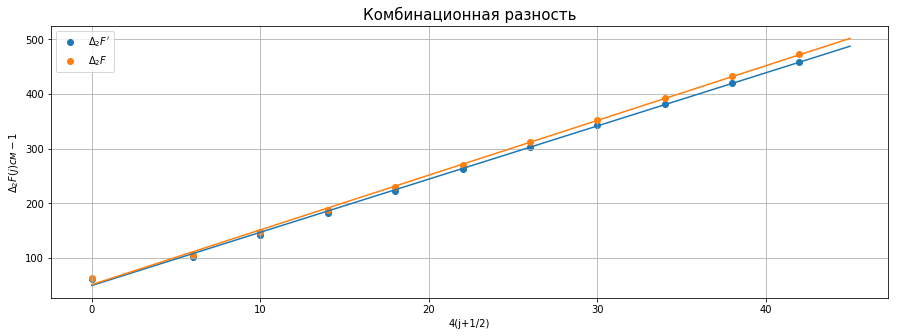

In [28]:
# подготовим данные к регресии
npF_ = np.array(dfF["$\Delta_2 F' см^{-1}$"])
npF__ = np.array(dfF['$\Delta_2 F" см^{-1}$'])
npj = np.zeros(len(npF_))
for i in range(1,11):
    npj[i] = 4*(i+1/2)

B1, intercept1, r_value, p_value, std_err = linregress(npj, npF_)
B0, intercept2, r_value, p_value, std_err = linregress(npj, npF__)

plt.figure(figsize= (15,5)) 
plt.scatter(npj, npF_,label = "$\Delta_2F'$")
plt.scatter(npj,npF__,label = '$\Delta_2F"$')
plt.plot([0,45],[49.54,487.2])
plt.plot([0,45],[51.14,501.59])
plt.title(r'Комбинационная разность', size=15)
plt.xlabel("4(j+1/2)")
plt.ylabel("$\Delta_2F(j) см-1$")
plt.grid()
plt.legend()

print("B1 = ",B1,"см^-1")
print("B0 = ",B0,"см^-1")

отсюда можно получить $\omega_e = 3053.8 см^{-1}, \chi = 0.023$

## Далее для нахождения коэффициентов B1, B0, D1, D0 рассмотрим следующие зависмости:

$\frac{\Delta_2 F'(j)}{(j+\frac{1}{2})} = 4B_1-8D_1(j+\frac{1}{2})^2$

$\frac{\Delta_2 F"(j)}{(j+\frac{1}{2})} = 4B_0-8D_0(j+\frac{1}{2})^2$

Получаем:
B1 =  10.17 см^-1
B0 =  10.47 см^-1
D1 =  0.91 *10^-3 см^-1
D0 =  0.9 *10^-3 см^-1


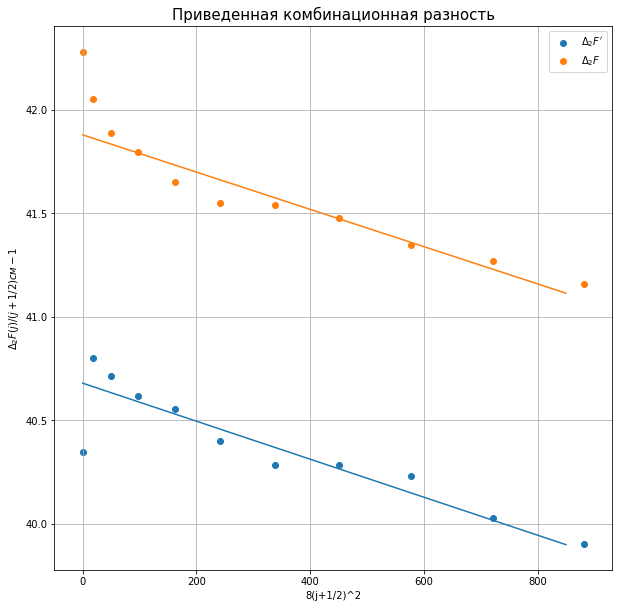

In [51]:
npf_ = npF_.copy()
npf__ = npF__.copy()
npJ = npj.copy()
for i in range(len(npF_)):
    npf_[i] = npF_[i]/(i+1+1/2)
    npf__[i] = npF__[i]/(i+1+1/2)
    npJ[i] = 0.5*npj[i]**2           

    
# лин.регр
D1_, B14, r_value, p_value, std_err = linregress(npJ[2:], npf_[2:])
D0_, B04, r_value, p_value, std_err = linregress(npJ[1:], npf__[1:])
     
        
plt.figure(figsize= (10,10)) 
plt.scatter(npJ, npf_,label = "$\Delta_2F'$")
plt.scatter(npJ,npf__,label = '$\Delta_2F"$')
plt.plot([0,850],[40.68,39.9])
plt.plot([0,850],[41.88,41.115])
plt.title(r'Приведенная комбинационная разность', size=15)
plt.xlabel("8(j+1/2)^2")
plt.ylabel("$\Delta_2F(j)/(j+1/2) см-1$")
plt.grid()
plt.legend()        

print("Получаем:")
print("B1 = ",(B14/4).round(2),"см^-1")
print("B0 = ",(B04/4).round(2),"см^-1")
print("D1 = ",((-D1_)*1000).round(2),"*10^-3 см^-1")
print("D0 = ",((-D0_)*1000).round(2),"*10^-3 см^-1")